<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 6**

- Principal Component Analysis recap
- PCA in practice: coordinate systems, projections

<hr/>

<h1><font color="darkblue">Principal Component Analysis</font></h1>
<hr/>

<img src=files/800px-GaussianScatterPCA.png width=250 align=right>

### What Features?

- High-dimensional data
- Data transformations
- Interesting directions
- Linear combinations
- Rotated coordinate system

### Location & Dispersion

- 1-dimensional

> For example, mean and variance

- $N$-dimensional

> E.g., again mean (duh!) and covariance matrix




### Principal Components

- Eigensystem of a covariance matrix is special

> $\displaystyle  C\,\boldsymbol{e}_k = \lambda_k\,\boldsymbol{e}_k \ \ \ $ for all $k=1\dots{}N$ 
>
> where
>
> $\displaystyle \boldsymbol{e}_k^T \boldsymbol{e}_l = \delta_{kl} \ \ \ $ for all $k$ and $l$

- The 1st principal component 

> The direction of maximum variance is the eigenvector $\boldsymbol{e}_1$ 
> that belongs to the largest eigenvalue $\lambda_1$
> and $\lambda_1$ is the variance along that direction

### Linear Combination

- If $X$ is a linear combination of the eigenvectors

> $\displaystyle  X = \sum_k \boldsymbol{e}_k \beta_{k} =  E\,\boldsymbol\beta$ 
>
> with orthonormal $E=[\boldsymbol{e}_1, ..., \boldsymbol{e}_N]$ eigenbasis

- We get the (random variable) coefficients

> $\displaystyle  \boldsymbol{\beta} = E^T\,X$ 
>
> because $E^T{}E = I$ and 
> 
> $\displaystyle  X =  E\,\boldsymbol\beta \;\; \Rightarrow \;\; E^T\,X =  E^T\,E\,\boldsymbol\beta $

### Coordinate Transformation

- New covariance matrix is diagonal and the elements are the eigenvalues of $C$

> If $\beta=E^T X$ and again assuming $\mathbb{E}[X]=0$ then
>
> $\displaystyle \ \ \ \ \ \ \ \ \mathbb{E}[\beta \beta^T] = \mathbb{E}[E^T XX^T E] = E^T \mathbb{E}[XX^T]\,E = E^T C\,E = \Lambda$
>
> where 
>
>$\displaystyle \ \ \ \ \ \ \ \ \Lambda =  \left( \begin{array}{ccc}
{\lambda_1} & 0 & \cdots & 0\\
0 & {\lambda_2} &   & \vdots\\
\vdots &  & \ddots & 0 \\
0 & \cdots & 0 & {\lambda_N} \\
\end{array} \right)$

<!-- -->

> Recall $C\,\boldsymbol{e}_l = \lambda_l\,\boldsymbol{e}_l$ for all $l$, so the $(k,l)$ element of the new covariance matrix 
>
>$\displaystyle \ \ \ \ \ \ \ \ \boldsymbol{e}_k^T C\,\boldsymbol{e}_l = \lambda_l\,\boldsymbol{e}_k^T  \boldsymbol{e}_l  = \lambda_l\delta_{kl} = \Lambda_{kl}$
>
> where $ \delta_{kl} = 1 $ if $ k = l $, 0 otherwise

- Note

> $\displaystyle E^T C\,E = \Lambda \;\; \Rightarrow \;\; E E^T C\,E E^T = E \Lambda E^T \;\; \Rightarrow \;\; C = E \Lambda E^T \;\; $ since $ \;\; E E^T = E^T E = I $

### Eigendecomposition 

- If we multiply with $E$ and $E^T$ from left and right 

> $ C = E\,\Lambda\,E^T$

> or

>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) $

### Largest Eigenvalues

- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $K<N$ eigenvectors, the best is to take the ones belonging to the $K$ largest eigenvalues PCs
>
> $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) =  E_K\Lambda_KE_K^T$



### Dimensionality Reduction


- A truncated set of eigenvectors $E_K$ defines a transformation that reduces the dimensionality from $N$ to $K$ while preserving the most variance possible

> $\displaystyle  \beta_K = E_K^T\, X $

> and

> $\displaystyle  X_K = E_K \beta_K = E_K E_K^T\, X = P_K\,X $




### Random Sample from Bivariate Normal 

- See previous lecture

In [ ]:
%pylab inline
from scipy.stats import norm as gaussian

In [ ]:
# Generate many 2D (column) vectors 
np.random.seed(42)
N = gaussian.rvs(0,1,(2,50))

# Copy it
S = np.copy(N)

# Scale axis 0
S[0,:] *= 4 

# Rotate by 45 degrees
f = +pi/4   
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(S)

# Shift it
X += np.array([[1],[3]])

# Plot the points
figure(figsize=(14,4)); #xlim(-10,10); ylim(-10,10);
subplot(1,3,1).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('normal')
scatter(N[0,:],N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,3,2).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('scaled')
scatter(S[0,:],S[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,3,3).set_aspect('equal'); xlim(-10,10); ylim(-10,10); title('final')
scatter(X[0,:],X[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

### Procedure of PCA

- Given Data matrix 
> $ X = (x_{ij})_{n \times m} $


- Centering
> $X_{new} = X - mean(X)$

- Decomposition
> Original data matrix 
 - $ X_{new} = U W V^T$
>
> Sample covariance matrix 
 - $\displaystyle  C = \frac{1}{n\!-\!1}\ X_{new} X_{new}^T = \frac{1}{n\!-\!1}\  \sum_i x_i x_i^T $
 - $ C = E \Lambda E^T $
>
> Hence
 - $\displaystyle  C = \frac{1}{n\!-\!1}\  UWV^T\ VWU^T = \frac{1}{n\!-\!1}\ U W^2 U^T = E \Lambda E^T $
 - $ E = U $
 - $\displaystyle  \Lambda = \frac{1}{n\!-\!1}\  W^2$

- Choose first $k$ components

In [ ]:
# Subtract sample mean (centering)
avg = mean(X, axis=1).reshape(X[:,1].size,1)
X -= avg

# Sample covariance matrix
C = X.dot(X.T) / (X[0,:].size-1) 
print ("Average\n", avg)
print ("Covariance\n", C)

In [ ]:
# Eigen decomposition of sample covariance matrix
L, E = np.linalg.eig(C)
E, L

In [ ]:
# Singular value decomposition of covariance yields the same
E, L, E_same = np.linalg.svd(C)
E, L

In [ ]:
# It's a rotation! i.e. EE^T = I
E.dot(E.T)

In [ ]:
# Also E^T and E^(-1) are close
np.allclose( E.T, np.linalg.inv(E) )

In [ ]:
# Singular value decomposition of data matrix yields also the same
U, W, V = np.linalg.svd(X)
U, W**2 / (X[0,:].size-1)

In [ ]:
# Check out the properties of U and V
[ np.allclose( U.T.dot(U), np.eye(U[:,0].size) ), 
  np.allclose( V.T.dot(V), np.eye(V[:,0].size) )  ]

In [ ]:
# Principle components from sklearn
from sklearn import decomposition

In [ ]:
# Object-oriented interface
pca = decomposition.PCA(n_components=X[:,0].size)

# sklearn uses a different convention
pca.fit(X.T) # note the transpose

# pca.transform(X.T)

# E and Lambda
print (pca.components_.T, pca.explained_variance_)

In [ ]:
# No more bug in the sklearn code - yeay! 
print (E, L)

In [ ]:
# Use to yield results without bessel correction
print (U, W**2 / X[0,:].size)

In [ ]:
# Rotation
A = E.T.dot(X);

# Plot
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(A[0,:],A[1,:],marker='o',s=50,alpha=0.3,edgecolor='none');

In [ ]:
# Projected points
P = E[:,:1].dot(E[:,:1].T).dot(X)

# Plot
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(X[0,:],X[1,:],marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
scatter(P[0,:],P[1,:],marker='o',color='r', s=50, alpha=0.3, edgecolor='none');

### How to choose k

- Percent variance
> Find the smallest number of components to explain a certain percentage of the total variance, i.e., keep the top $k$ components where $k$ is the smallest integer between 1 and $m$ such that

$$ \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{m} \lambda_i}\ge \alpha $$

- Scree plot

In [22]:
# Generate data
X = stats.norm.rvs(0,1,(10,100))
e1 = stats.uniform.rvs(2,4,(4,100))
e2 = stats.uniform.rvs(20,30,(6,100))
X[0:4,:] = X[0:4,:] + e1
X[4:,:] = X[4:,:] + e2

In [23]:
# Centering
avg = mean(X, axis=1).reshape(X[:,1].size,1)
X -= avg

# Sample covariance matrix
C = X.dot(X.T) / (X[0,:].size-1) 

# Decomposition
E, Lambda, _ = linalg.svd(C)

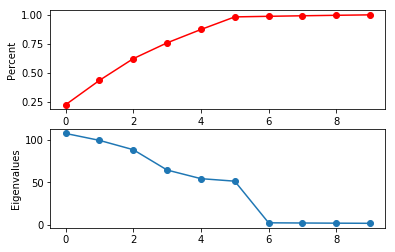

In [24]:
# Scree plot
S = np.cumsum(Lambda)
R = S / S[-1]
subplot(211);
plot(R,'ro-'); 
ylabel('Percent');
subplot(212);
plot(Lambda,'o-'); 
ylabel('Eigenvalues');

- [Profile likelihood](https://www.sciencedirect.com/science/article/pii/S0167947305002343)

#### References

- Jackson, J. Edward. A user's guide to principal components. Vol. 587. John Wiley & Sons, 2005.

### Whitening
- Frequently used to preprocess data, e.g., in signal processing
>$ \displaystyle Z = \Lambda^{-1/2}\ E^T\ X$

- Make features less redundant
> Less correlated with each other
>
> Same variance


- **Unhomework:** Verify that its covariance matrix is identity
> Hint
  - $ \displaystyle C_Z = \frac{1}{n-1} Z Z^T  $
  - $ \displaystyle C = \frac{1}{n-1} X X^T = E \Lambda E^T $
  - $ \displaystyle E E^T = E^T E = I $
>
> Just write it out

In [ ]:
# Calculate and plot whitened coordinates
B = diag(1/sqrt(L)).dot(A)

figure(figsize=(5,5)); xlim(-5,5); ylim(-5,5);
scatter(B[0,:],B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');

In [ ]:
# cf. original normal randoms in cell [2]
figure(figsize=(11,5)); 
subplot(1,2,1).set_aspect('equal'); xlim(-5,5); ylim(-5,5); title('whitened')
scatter(B[0,:],B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
subplot(1,2,2).set_aspect('equal'); xlim(-5,5); ylim(-5,5); title('original')
scatter(-N[0,:],N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none');

- PCA in `sklearn` ([Tutorial](http://scikit-learn.org/stable/modules/decomposition.html))

In [ ]:
from sklearn.decomposition import PCA

In [25]:
# Choose first 3 PCs by setting [n_componts] = 3 and whitening the data by setting [whiten] = True
pca = PCA(n_components=3, whiten=True)
pca.fit(X.T);

In [26]:
# Compare with Lambda
pca.explained_variance_

array([ 107.73160671,   99.57625475,   88.5659707 ])

In [27]:
Lambda

array([ 107.73160671,   99.57625475,   88.5659707 ,   64.60346033,
         54.4455435 ,   51.48059568,    2.39884366,    2.1702168 ,
          1.97037653,    1.80419974])

In [28]:
# Compare with Lambda / sum(Lambda)
pca.explained_variance_ratio_

array([ 0.22692422,  0.20974591,  0.18655401])

In [29]:
Lambda / sum(Lambda)

array([ 0.22692422,  0.20974591,  0.18655401,  0.13607975,  0.11468326,
        0.10843794,  0.00505289,  0.00457131,  0.00415037,  0.00380034])

In [30]:
# Transform the data
XX = pca.fit_transform(X.T)

In [31]:
print('Original Dimension: ', X.T.shape)
print('Reducted Dimension: ', XX.shape)

Original Dimension:  (100, 10)
Reducted Dimension:  (100, 3)
